# Lab 4 Rong Xu(Cherie)

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [89]:
df = pd.read_csv("GSS.2006.csv")
df.head(5)

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Run a simple regression, with at least two Xs in it, and interpret your results. (Did the results fit your expectations? Why? Why not?)

In [90]:
df.race.describe()

count    4510.000000
mean        1.403104
std         0.709402
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: race, dtype: float64

In [91]:
conditions =[
    (df['race'] < 2),
    (df['race'] >1)]
choices = [1,2]
df['race1'] = np.select(conditions, choices, default=np.nan)
df.race1.describe()

count    4510.000000
mean        1.271840
std         0.444957
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: race1, dtype: float64

In [92]:
df.race1.value_counts(normalize=True)

1.0    0.72816
2.0    0.27184
Name: race1, dtype: float64

### for this question, i chose two Xs, there are:  race and father's highest educational degree. For race, i recode it and seperate it to two categories, white(1) and non-white (2), which will help us to see, in white and non-white family, how father's highest educational degree will affect their child's highest educational degree. For this question, I assume that father's degree could have positive relationship on child's degree and white family is more affected by it compared with non-white family.

In [93]:
lm1 = smf.ols(formula = 'degree ~ padeg + race1', data = df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 degree   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     273.1
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          2.16e-107
Time:                        23:54:07   Log-Likelihood:                -3556.9
No. Observations:                2358   AIC:                             7120.
Df Residuals:                    2355   BIC:                             7137.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6148      0.075     21.540      0.000       1.468       1.762
padeg          0.3934      0.018     21.683      0.000       0.358       0.429
race1         -0.3172      0.053     -5.935      0.000      -0.422      -0.212
==============================================================================
Omnibus:                      155.218   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.727
Skew:                           0.668   Prob(JB):                     3.45e-40
Kurtosis:                       2.747   Cond. No.                         8.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the output, the R-square is 0.188, which means 18.8% of the variation in dependent variable of child dgree is explained by the independent variables father's degree and race. In order to further proven my statement, let's also look at the other rate.
### looking at the coeffeient, if constant the race, there is a positive relationship between degree and padeg that there is 0.3934 unit of degree increase for each one additional unit increase on padeg, with a statistically significant as pvalue is lower than 0, which means father's highest educational level has positive correlation on their child's educational degree, by raise 0.3946. looking at the t score, t=21.763(in absolute term), from the normal distribution, we could know it has a significantly low possibily to have had happen by chance. It's reasonably unlikely that I would get a coefficient this large (in absolute terms) with a small standard error (0.018) by chance. 
### If constant the padeg, there is a negative relationship between race and degree that there is 0.3172 unit of degree decrease for each one addtional unit increase on race, with a statistically significant as pvalue is lower than 0, which means compared with white group, non-white group's educational degree dropped 0.3172. looking at the t score, t=5.935(in absolute term), from the normal distribution, we could know it has a significantly low possibily to have had happen by chance. It's reasonably unlikely that I would get a coefficient this large (in absolute terms) with a small standard error (0.053) by chance.
### The result meets my expectation that father's educational degree will positively affect their kid's educational degree. In order to determine, how the race will affect this result, i will incldue an interaction between race and father's degree. 

# 2. Add an interaction term to that model that you think might moderate the original relationship between X1 and X2. Explain why you think an interaction might be present and in what direction it would work. Explain your results. Did it work out? Yes? No?

In [94]:
lm2 = smf.ols(formula = 'degree ~ padeg*race1', data = df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 degree   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     185.2
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          8.47e-108
Time:                        23:54:07   Log-Likelihood:                -3553.0
No. Observations:                2358   AIC:                             7114.
Df Residuals:                    2354   BIC:                             7137.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7593      0.091     19.316      0.000       1.581       1.938
padeg           0.2426      0.057      4.249      0.000       0.131       0.355
race1          -0.4310      0.067     -6.412      0.000      -0.563      -0.299
padeg:race1     0.1253      0.045      2.785      0.005       0.037       0.213
==============================================================================
Omnibus:                      156.216   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.099
Skew:                           0.667   Prob(JB):                     2.87e-40
Kurtosis:                       2.729   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### race1 present white group. This interaction term represents the difference in the father's degree effect between white family group and non-white family group. For white family group, they initially have an average degree value of 1.7593.  Non-white family group have a 0.431 unites lower on the respondent's degree than white family group in terms of their father's degree.
### In padeg:race1, its coefficient is 0.1253, which means with father's degress goes up, white group family of their kids' degree raise up by 0.1253 unit, in relative of non-white group family, at a statistically significant level. In other word,  the respondents degree for white family group increased by 0.2426 with their father's degree, while for non while family group, their kids(for respondents) degree is decreased  by 0.1173  (0.2426-0.1253) with their father's degree. 
### The interaction is present and it work and they are at statistically significant level. Also the R-square is increase from 0.188 to 0.191, which increase the possibility of how the dependent variable is explained by the independent variable. R-square =0.191, means we are only able to explain 19.1% of the total variance using paedu and race. 

# 3. Extra Credit: Plot the relationship found in the interaction.

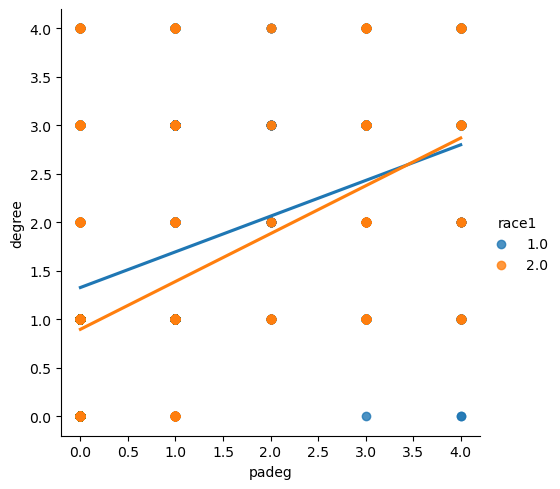

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.lmplot(x='padeg', y='degree', hue='race1', data=df, ci=None)
plt.show()

### in this graph, 1- white, 2-non-white, we can see white respondent's degree starts initially higher than non-white degree by not looking at their father's degree.  